<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


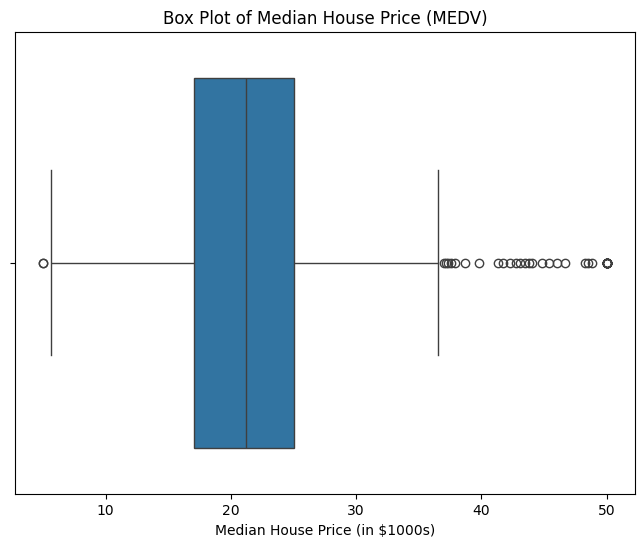

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 箱ひげ図の作成
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Box Plot of Median House Price (MEDV)')
plt.xlabel('Median House Price (in $1000s)')
plt.show()


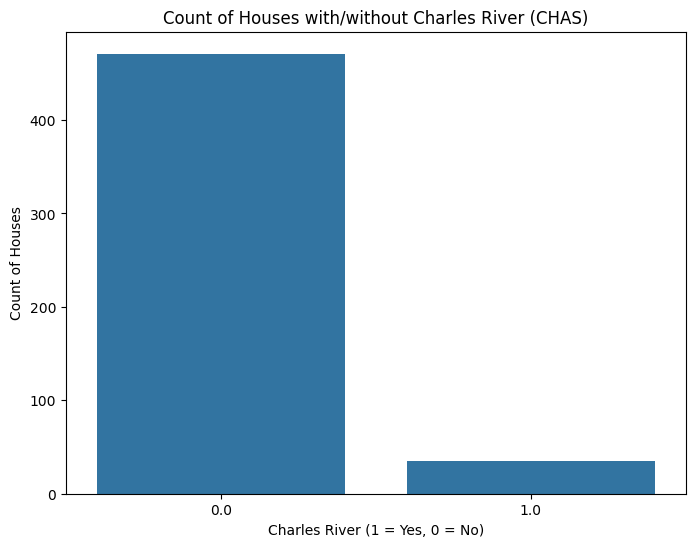

In [12]:
# チャールズ川の変数の棒グラフ
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Count of Houses with/without Charles River (CHAS)')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count of Houses')
plt.show()


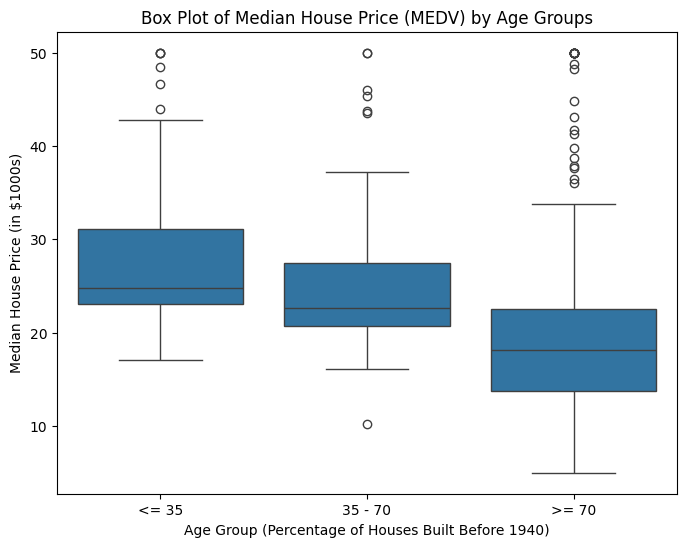

In [16]:
# AGEのカテゴリーを作成
age_groups = ['<= 35', '35 - 70', '>= 70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=age_groups)

# 箱ひげ図の作成
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Box Plot of Median House Price (MEDV) by Age Groups')
plt.xlabel('Age Group (Percentage of Houses Built Before 1940)')
plt.ylabel('Median House Price (in $1000s)')
plt.show()


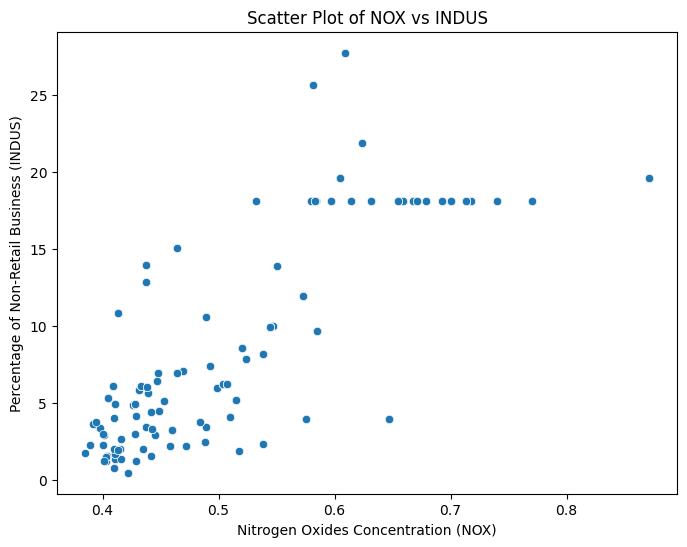

In [17]:
# 散布図の作成
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitrogen Oxides Concentration (NOX)')
plt.ylabel('Percentage of Non-Retail Business (INDUS)')
plt.show()


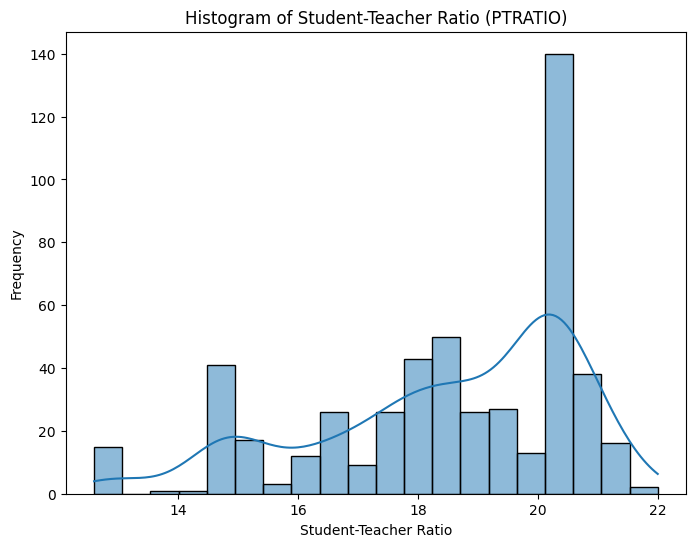

In [18]:
# ヒストグラムの作成
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=20)
plt.title('Histogram of Student-Teacher Ratio (PTRATIO)')
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [21]:
from scipy import stats

# チャールズ川がある場合とない場合でMEDVの平均を比較
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# 独立標本t検定を実行
t_stat, p_value = stats.ttest_ind(chas_yes, chas_no)

# 結果
t_stat, p_value


(3.996437466090509, 7.390623170519905e-05)

In [22]:
# AGEを3つのグループに分ける
age_groups = ['<= 35', '35 - 70', '>= 70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=age_groups)

# 各AGEグループごとにMEDVを抽出
medv_by_age_group = [boston_df[boston_df['AGE_group'] == group]['MEDV'] for group in age_groups]

# ANOVAを実行
f_stat, p_value = stats.f_oneway(*medv_by_age_group)

# 結果
f_stat, p_value


(36.40764999196599, 1.7105011022702984e-15)

In [23]:
# ピアソン相関を実行
corr_stat, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# 結果
corr_stat, p_value


(0.7636514469209192, 7.913361061210442e-98)

In [24]:
from sklearn.linear_model import LinearRegression

# 特徴量とターゲット変数を設定
X = boston_df[['DIS']]
y = boston_df['MEDV']

# 回帰分析モデルの作成
model = LinearRegression()
model.fit(X, y)

# 回帰係数とp値
coeff = model.coef_[0]
intercept = model.intercept_

# 回帰モデルの予測値とR^2
r2_score = model.score(X, y)

coeff, intercept, r2_score


(1.0916130158411106, 18.39008833049338, 0.062464372121782796)